# COMP90042 Assignment #1: Sentiment analysis for tweets

In [293]:
Student Name: Yan Na
Student ID: 615913

SyntaxError: invalid syntax (<ipython-input-293-0014b4a086b8>, line 1)

## General info

<b>Due date</b>: 5pm, Mon April 12

<b>Submission method</b>: see LMS

<b>Submission materials</b>: completed copy of this ipython notebook

<b>Late submissions</b>: -10% per day, no late submissions after the first week

<b>Marks</b>: 25% of mark for class

<b>Overview</b>: For this project, you'll be building a 3-way polarity classification system for tweets, using a logistic regression classifier, BOW features, as well as polarity lexicons built from external sources. A key focus of this project is critical analysis and experimental evaluation, for which you will need to report on the relative merits of various options. 

<b>Materials</b>: See the main class LMS page for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Sci-kit Learn, and Gemsim. In particular, if you are not using a lab computer which already has it installed, we recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python build-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. You are encouraged to use the iPython notebooks released for this class as well as other online documentation to guide your responses, but you should not copy directly from any source. The only other data you will need is three sets of tagged tweets, the first two of which (training and dev) were released at the same time as this notebook, and a third set (test) which will be made available about a week before the assignment is due, see Final Testing below. This data comes from the recent SemEval 2016 shared task. Do not distribute this data indiscriminately (i.e. put it on a public website), you should use it only for this assignment, and delete it afterwards. The corpus is comprised of unfiltered text from the web, and may include offensive or objectionable material. This reflects the general composition of the web and the general challenges present in web based text analysis. The University of Melbourne takes no responsibility for opinions expressed in the corpus, nor takes any responsibility for offence caused by these documents.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time (less than 10 minutes on a lab desktop), and you must follow all instructions provided below, including specific implementation requirements. You will be marked not only on the correctness of your methods, but also on your explanation and analysis. Please do not change any of instruction text in the notebook. Where applicable, leave the output cells in the code, particularly when you are commenting on that output. You should add your answers and code by inserting a markdown cell between every major function or other block of code explaining its purpose or anywhere a result needs to be discussed (see the class notebooks for examples). Note that even if you do something wrong, you might get partial credit if you explain it enough that we can follow your reasoning, whereas a fully correct assignment with no text commentary will not receive a passing score. You will not be marked directly on the performance of your final classifier, but each of the steps you take to build it should be reasonable and well-defended.

<b>Updates</b>: Any major changes to the assignment will be announced via LMS. Minor changes and clarifications will be announced in the forum on LMS, we recommend you check the forum regularly.

<b>Academic Misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this project, and we encourage you to discuss it in general terms with other students. However, it is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.


## Preprocessing

<b>Instructions</b>: Your first task is to carry out preprocessing on the tweets. Use the code below as a starter. Each line of the input files is a json including the tweet and the label (and the tweet id), this code just loads them into a list without any preprocessing. Note that for the labels, 1 = positive, 0 = neutral, -1 = negative. Here is a list of things your preprocessing code must do:

<ul>
<li>Segment into sentences: Use NLTK punkt sentence segmenter</li>
<li>Tokenize sentences: Use the NLTK regex WordPunct tokenizer</li>
<li>Lowercase all words</li>
<li>Remove Twitter usernames: Usernames on twitter begin with @</li>
<li>Remove URLs: URLs start with http</li> 
<li>Remove any hashtags from their original location in the tweet, tokenize them, and add them as a separate sentences with the hash tag removed: for tokenization, use capitalized letters when they occur (e.g. #RefugeesWelcome -> Refugees Welcome), or when there is no capitalization (#refugeeswelcome -> refugees welcome) use the MaxMatch algorithm and the list of English words included in NLTK (nltk.corpus.words.words()). Two notes about the English word list: 1. you should convert it to a python set before you use it (sets are hashed, so you get much quicker lookup) 2. It contains only base forms, so you will need to lemmatize words before you look them up.</li>
</ul>

You can do these in almost any order you like, but it may be useful to do the main segmentation/tokenization last (or almost last), since for the other tasks it is easier to deal with the raw string rather than a list of tokens. The use of regular expressions is recommended, but not required.



In [300]:
import json
import nltk
import re
from sklearn.metrics import accuracy_score, classification_report

theDictionary = nltk.corpus.words.words()
theDicSet = set(theDictionary)


def hashtags_seperation(tweet): # this function is used to seperate the hashtags from the tweets in the required format
    global theCurrTw
    global twTokens
    global moreThanOne
    newTweet = tweet[:]
    hashtags = re.findall(r'#\S*',newTweet)
    #print newTweet # for testing
    newTweet=re.sub(r'#\S*','',newTweet)
    newTweet = newTweet.lower() # put lowercase function here to avoid its affect to hastags
    #print newTweet # for testing
    for hashtag in hashtags:
        hashtag = re.sub(r'#','',hashtag).strip()
        #print "the original hashtag is:",hashtag #for testing 
        newTweet = newTweet + '. ' + hashtag_tokenization(hashtag)
        wordsInTag = hashtag_tokenization(hashtag).split(' ') #convert the hashtag(string) to hastag(list)
        for element in wordsInTag: # remove the '' in the list which is generated by max_match
            if element == '':
                del wordsInTag[wordsInTag.index(element)]              
        wordNum = len(wordsInTag) #calculate word numbers in the hashtag
        
        #print "wordNUM= ",wordNum, # for testing 
        #print "type:", type(wordsInTag[1]) # for testing
        #print "wordsInTag = ",wordsInTag # for testing
        if wordNum > 1:
            moreThanOne = True
    #print hashtags # for testing
    return newTweet


def hashtags_seperation_v2(tweet): # this function is used to seperate the hashtags from the tweets in the required format
    global theCurrTw
    global twTokens
    global moreThanOne
    newTweet = tweet[:]
    hashtags = re.findall(r'#\S*',newTweet)
    #print newTweet # for testing
    newTweet=re.sub(r'#\S*','',newTweet)
    newTweet = newTweet.lower() # put lowercase function here to avoid its affect to hastags
    #print newTweet # for testing
    for hashtag in hashtags:
        hashtag = re.sub(r'#','',hashtag).strip()
        #print "the original hashtag is:",hashtag #for testing 
        newTweet = newTweet + '. ' + hashtag_tokenization_v2(hashtag)
        wordsInTag = hashtag_tokenization_v2(hashtag).split(' ') #convert the hashtag(string) to hastag(list)
        for element in wordsInTag: # remove the '' in the list which is generated by max_match
            if element == '':
                del wordsInTag[wordsInTag.index(element)]              
        wordNum = len(wordsInTag) #calculate word numbers in the hashtag
        
        #print "wordNUM= ",wordNum, # for testing 
        #print "type:", type(wordsInTag[1]) # for testing
        #print "wordsInTag = ",wordsInTag # for testing
        if wordNum > 1:
            moreThanOne = True
    #print hashtags # for testing
    return newTweet
      
def hashtag_tokenization(hashtag): # this is for tokenizing hashtags extracted from "hashtags_seperation(tweet)"
    thetag = hashtag[:]
    theNewTag = ""
    tokensList = []
    if re.search(r'[A-Z]',thetag):
        tokensList = re.findall(r'[A-Z][^A-Z]*',thetag)
        theNewTag = ' '.join(tokensList)
    else:
        #global theDictionary # = nltk.corpus.words.words()[:]
        try:
            theNewTag = max_match(thetag)
        except Exception,e:
            print e
            print "the error is " + thetag         
    theNewTag = theNewTag.lower() # whether the hastags should be displayed in lowercase??
    return theNewTag
    
def hashtag_tokenization_v2(hashtag): # this is for tokenizing hashtags extracted from "hashtags_seperation(tweet)"
    thetag = hashtag[:]
    theNewTag = ""
    tokensList = []
    if re.search(r'^[A-Z]+$',thetag):
        thetag = thetag.lower() #if all the letters in the tag are uppercase, transfer them all to lowercase
    if re.search(r'[A-Z]',thetag):
        tokensList = re.findall(r'[A-Z][^A-Z]*',thetag)
        theNewTag = ' '.join(tokensList)
    else:
        #global theDictionary # = nltk.corpus.words.words()[:]
        try:
            theNewTag = max_match(thetag)
        except Exception,e:
            print e
            print "the error is " + thetag         
    theNewTag = theNewTag.lower() # whether the hastags should be displayed in lowercase??
    return theNewTag

def max_match(hashtag): # this is referenced from the M3 ch2
    thetag = hashtag[:]
    global theDicSet
    #thedic = dictionary[:]
    #theDicSet = set(thedic) #transfer "nltk.corpus.words.words()" array to set
    i = len(thetag)
    if thetag == '':
        return ''
        
    while i >= 1:
        firstword = thetag[0:i]
        remainder = thetag[i:]
        #if thedic.count(lemmatization(firstword)) != 0: 
        if lemmatization(firstword) in theDicSet: 
            # use lemmatized hastag because the word list only containts base forms
            #print firstword + ' ' + remainder # for testing
            return firstword + ' ' + max_match(remainder)       
        i=i-1
        
    firstword = thetag[0]
    remainder = thetag[1:]
    return firstword + ' ' + max_match(remainder)

def lemmatization(word):
    lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
    lemma_word = lemmatizer.lemmatize(word,'v')
    if lemma_word == word:
        lemma_word = lemmatizer.lemmatize(word,'n')
    return lemma_word

def username_remove(tweet):
    newTweet = tweet[:]
    newTweet = re.sub(r'@\S*','',newTweet)
    return newTweet

def URL_removal(tweet):
    newTweet = tweet[:]
    newTweet = re.sub(r'http\S*','',newTweet)
    return newTweet
    
def sentence_segmenter(tweet):
    segmenter = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = segmenter.tokenize(tweet)
    return sentences

def tokenizer(aSentence):
    word_tokenizer = nltk.tokenize.regexp.WordPunctTokenizer()
    tokens = word_tokenizer.tokenize(aSentence)
    return tokens
    
def preprocess(tweet):
    global twTokens
    global moreThanOne
    global exampleNum
    
    theTweet = tweet[:]
    theTweet = username_remove(theTweet) #remove username
    theTweet = URL_removal(theTweet) # remove url
    theTweet = hashtags_seperation(theTweet) #lowercasing and seperating hastags        
    theSentences = sentence_segmenter(theTweet) #segment the tweet into sentences
    word_tokens = []
    for sentence in theSentences: #tokenization of tweets
        theNewTokens = tokenizer(sentence)[:]
        theNewTokens = [lemmatization(token) for token in theNewTokens] #lemmatizing the final tokens of each tweet
        word_tokens = word_tokens + theNewTokens
    twTokens = word_tokens[:]
    if moreThanOne and (exampleNum < 20):
        print "the tweet with hashtags of more than one word is: " + theCurrTw
        print "the preprocessed tweet with hashtags of more than one word is: ", twTokens, "\n"
        exampleNum = exampleNum + 1
    return word_tokens

def preprocess_no_lemma(tweet): # to preprocess tweet without lemmatize the final tokens
    global twTokens
    global moreThanOne
    global exampleNum
    
    theTweet = tweet[:]
    theTweet = username_remove(theTweet) #remove username
    theTweet = URL_removal(theTweet) # remove url
    theTweet = hashtags_seperation(theTweet) #lowercasing and seperating hastags        
    theSentences = sentence_segmenter(theTweet) #segment the tweet into sentences
    word_tokens = []
    for sentence in theSentences: #tokenization of tweets
        theNewTokens = tokenizer(sentence)[:]
        #theNewTokens = [lemmatization(token) for token in theNewTokens] #lemmatizing the final tokens of each tweet
        word_tokens = word_tokens + theNewTokens
    twTokens = word_tokens[:]
    if moreThanOne and (exampleNum < 20):
        print "the tweet with hashtags of more than one word is: " + theCurrTw
        print "the preprocessed tweet with hashtags of more than one word is: ", twTokens, "\n"
        exampleNum = exampleNum + 1
    return word_tokens

def preprocess_no_lemma_hashtagV2(tweet): # to preprocess tweet without lemmatize the final tokens
    global twTokens
    global moreThanOne
    global exampleNum
    
    theTweet = tweet[:]
    theTweet = username_remove(theTweet) #remove username
    theTweet = URL_removal(theTweet) # remove url
    theTweet = hashtags_seperation_v2(theTweet) #lowercasing and seperating hastags        
    theSentences = sentence_segmenter(theTweet) #segment the tweet into sentences
    word_tokens = []
    for sentence in theSentences: #tokenization of tweets
        theNewTokens = tokenizer(sentence)[:]
        #theNewTokens = [lemmatization(token) for token in theNewTokens] #lemmatizing the final tokens of each tweet
        word_tokens = word_tokens + theNewTokens
    twTokens = word_tokens[:]
    if moreThanOne and (exampleNum < 20):
        print "the tweet with hashtags of more than one word is: " + theCurrTw
        print "the preprocessed tweet with hashtags of more than one word is: ", twTokens, "\n"
        exampleNum = exampleNum + 1
    return word_tokens

def preprocess_file(filename): # to preprocess tweet file with lemmatizing the final tokens
    global theCurrTw
    global moreThanOne
    #print filename
    tweets = []
    labels = []
    f = open(filename,'r') 
    for line in f:
        tweet_dict = json.loads(line)
        theCurrTw = tweet_dict["text"]
        tweets.append(preprocess(theCurrTw))
        labels.append(int(tweet_dict["label"]))
        moreThanOne = False
    return tweets,labels

def preprocess_file_no_lemma(filename): # to preprocess tweet file without lemmatizing the final tokens
    global theCurrTw
    global moreThanOne
    #print filename
    tweets = []
    labels = []
    f = open(filename,'r') 
    for line in f:
        tweet_dict = json.loads(line)
        theCurrTw = tweet_dict["text"]
        tweets.append(preprocess_no_lemma(theCurrTw))
        labels.append(int(tweet_dict["label"]))
        moreThanOne = False
    return tweets,labels

def preprocess_file_no_lemma_hashtagV2(filename): # to preprocess tweet file with new hashtag method
    global theCurrTw
    global moreThanOne
    #print filename
    tweets = []
    labels = []
    f = open(filename,'r') 
    for line in f:
        tweet_dict = json.loads(line)
        theCurrTw = tweet_dict["text"]
        tweets.append(preprocess_no_lemma_hashtagV2(theCurrTw))
        labels.append(int(tweet_dict["label"]))
        moreThanOne = False
    return tweets,labels


#tweet="Hi, Ryan, #afs8#*"
#hashtags_seperation(tweet)
#tweet = "I like you#HashTag"
#print hashtags_seperation(tweet)

#try:
#    hashtag = "maxhash"
#    theDictionary = nltk.corpus.words.words()[:]
#    print max_match (hashtag,theDictionary)
#except Exception,e:
#    print e

#t1 = "@HeartNorthWest #time you can't beat a bit off Michael Jackson on a Wednesday morning tunnel"
#t2 = "Hi, I hate you,#HashTag @hahaha , https://t.co/baLteWO0P9"
#t3 = "Hi, I hate bug #"
#tag = "maxhash"
#print max_match(tag,theDictionary)
#print t3 + " ---- " + hashtags_seperation(t3)
#print t1 + " ---- " + hashtags_seperation(t1)
#print t2 + " ---- " + hashtags_seperation(t2)
#print username_remove(t2)
#print preprocess(t1)

#theCurrTw = ""
#tweetsList,labelList = preprocess_file\
#(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\dev.json")
#print tweetsList[1:20]

<b>Instructions</b>: Once your basic preprocessing module is working, run it on the training set and have it print out 10 examples where your system identified a hashtag with more than one word inside; print out both the original tweet string as well as result after preprocessing. It's okay if you have to duplicate some code from above to do this. Point out any errors you see in the preprocessing, and discuss possible solutions; these can be related to the hashtags, or any other errors you see. You do not have to fix the errors unless they actually indicate a actual bug in your code (at which point you should go back to the previous section, fix the code, and print out the samples again).

In [301]:

theCurrTw = "" # this is for tracking the current tweet that will be preprocessed
twTokens = [] # this is for tracking the tweet that has been preprocessed 
moreThanOne = False # this is for indicating whether the tweet has a hashtag with more than one word inside
exampleNum = 0
#tweetsList,labelList = preprocess_file\ # to preprocess tweet file with lemmatizing the final tokens
#(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json")
tweetsList,labelList = preprocess_file_no_lemma\
(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json")


the tweet with hashtags of more than one word is: If I make a game as a #windows10 Universal App. Will #xboxone owners be able to download and play it in November? @majornelson @Microsoft
the preprocessed tweet with hashtags of more than one word is:  [u'if', u'i', u'make', u'a', u'game', u'as', u'a', u'universal', u'app', u'.', u'will', u'owners', u'be', u'able', u'to', u'download', u'and', u'play', u'it', u'in', u'november', u'?', u'.', u'windows', u'1', u'0', u'.', u'x', u'box', u'one'] 

the tweet with hashtags of more than one word is: For the 1st time @Skype has a "High Startup impact" Does anyone at @Microsoft have a clue?#Windows10Fail http://t.co/loO3yd5rwe
the preprocessed tweet with hashtags of more than one word is:  [u'for', u'the', u'1st', u'time', u'has', u'a', u'"', u'high', u'startup', u'impact', u'"', u'does', u'anyone', u'at', u'have', u'a', u'clue', u'?', u'.', u'windows10', u'fail'] 

the tweet with hashtags of more than one word is: #teens @BillGates 1st company f

In [302]:
####################################analysis########################################################################
# this block can print out 10 example, each of them has a hashtag with more than one word inside. I also tried to 
# lemmatize final tokens. But I think the inflection of words could be useful information, so I use the tokens without
# lemmatization as my formal results
#
# Errors:
# There are some kind of errors in the preprocessing result:
# 
# 1. special words misunderstood
# because of the limitation of the word list, there are some special words in hastags that cannot be extracted correctly.
# For instance, the #google will be tokenized to ['goo','g','l','e']. 
# For addressing this, we could need to expand the list of words for making more words involved. 
# 
# 2. capitalization misunderstood
# capitalization cannot always be used for tokenization of hashtags correctly, for instance, #MBA will be tokenized to 
# ['M','B','A'], #jointheUPRISE will be tokenized to ['U','P','R','I','S','E'], where the "jointhe" has been lost.
#
# For addressing this problem, we could treat the continuous capital letters as one token. 
#
# 3. meanless informal words
# some informal usage of words become meanless when become a token. for example, the 'B' in "May B" will become "b". This
# error is accepted, I think, in machine learning project. 
#
# 4. numbers in hashtags misunderstood
# the number in a hashtag will be tokenized one by one, which always gives meanless results. for instance, #msapc2015 will
# become ['m''s''a''p''c''2''0''1''5']
# For addressing this, the continuous digits could be treated as one token.
# 

<b>Instructions</b>: The next step will be to convert each of your preprocessed tweets into a feature dictionary, that is, a python dictionary where each entry corresponds to a feature and its value. At this stage, you should just build a bag-of-word feature dict, though you must allow for two possible options: one is to remove stopwords (using the NLTK stopword list), and the other is to remove words appearing <em>less</em> than n times across the entire training set (n<=0 should have no effect). The outer function (convert_to_feature dicts) should take the list of tweets resulting from the preprocess_file, and return a list of feature dictionaries in the same order (so they correspond to the label)

In [303]:
from sklearn.feature_extraction import DictVectorizer
from nltk.corpus import stopwords

def convert_to_feature_dicts(tweets,remove_stop_words,n):
    feature_dicts = []
    for tweet in tweets:
        # build feature dictionary for tweet
        feature_dict = {}
        feature_dict = BOW_no_stopwords_no_rarewords(tweet,remove_stop_words,n)
        feature_dicts.append(feature_dict)
    return feature_dicts

def BOW_no_stopwords_no_rarewords(tweet,stop_words,n): #to generate BOW without stop words 
    global tweetDcit
    theBOW = {}    
    for token in tweet:
        if (token not in stop_words) and (tweetDict.get(token,0)>=n):
            theBOW[token] = theBOW.get(token,0) + 1
    return theBOW

def entire_set(tweetsList): # to combine all the tokenized tweets together to one List
    entireTweets = []
    for element in tweetsList:
        entireTweets = entireTweets + element
    return entireTweets

def dictionary_tweet(tweetsList):# for generating a BOW of all the tokens in input dateset
    entireList = entire_set(tweetsList)
    theBOW_all = {}
    for token in entireList:
        theBOW_all[token] = theBOW_all.get(token,0) + 1
    return theBOW_all

#########################Testing####################################
#tweetDict = dictionary_tweet(tweetsList)
#engStop = stopwords.words('english')
#feaDict = convert_to_feature_dicts(tweetsList,engStop,100)
#print feaDict[0:10]

# use global variable to avoid repeated generation of the dictionary of the whole training set
# print dictionary_tweet(tweetsList)
####################################################################

########################Running#####################################
tweetDict = dictionary_tweet(tweetsList)
engStop = stopwords.words('english')
feaDict = convert_to_feature_dicts(tweetsList,engStop,100)
print feaDict[0:10]

[{u'c': 1, u"'": 1, u'great': 1, u',': 1, u'mac': 1, u'mon': 1, u'.': 1, u'?': 1}, {u'!': 1, u"'": 1, u'make': 1, u'2nd': 1, u'time': 1, u'.': 1}, {u'play': 1, u'make': 1, u'.': 3, u'1': 1, u'0': 1, u'game': 1, u'x': 1, u'november': 1, u'one': 1, u'?': 1}, {u'may': 1, u'make': 1, u',': 2, u'.': 3}, {u'.': 3, u'let': 1, u'1st': 1}, {u'!': 1, u'.': 1, u'!!!': 1, u'2nd': 1}, {u',': 1, u'/': 1, u'.': 1, u'3': 1, u'1st': 1, u';': 1, u'ever': 1}, {u'"': 1, u'says': 1, u'$': 1, u'may': 1, u',': 3, u'.': 2, u'still': 1}, {u',': 1, u'.': 1, u'sunday': 1, u'time': 1, u'morning': 1, u'day': 1}, {u'10': 1, u"'": 1, u'get': 1, u'wednesday': 1, u'.': 1, u'?': 1}]


## Tuning and classifying

<b>Instructions</b>: Using the functions you've written, you should produce lists of feature dictionaries for both training and development sets; for the training set, remove stopwords and all words that appear only once (do <em>not</em> this for the dev set). Using scikit learn, convert the data to the sparse representation used for training classifiers.

In [304]:
# to preprocess training without lemmatizing the final tokens
trainTweets,trainLabels = preprocess_file_no_lemma\
(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json")

# to preprocess development without lemmatizing the final tokens
devTweets,devLabels = preprocess_file_no_lemma\
(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\dev.json")

#generate the dictionary of whole training dataset
tweetDict = dictionary_tweet(trainTweets)
engStop = stopwords.words('english')

#generate the feature dictionary of training dataset
trainFea = convert_to_feature_dicts(trainTweets,engStop,2)

#generate the feature dictionary of development dataset
devFea = convert_to_feature_dicts(devTweets,engStop,0)

#convert the data to the sparse representation used for training classifiers.
from sklearn.feature_extraction import DictVectorizer
vectorize = DictVectorizer()
trainData = vectorize.fit_transform(trainFea)
devData = vectorize.transform(devFea)

print trainData
print devData
print trainLabels
print devLabels

##########################################testing##########################################
print trainData
print devData
print trainLabels
print devLabels
############################################################################################

  (0, 52)	1.0
  (0, 93)	1.0
  (0, 111)	1.0
  (0, 523)	1.0
  (0, 1843)	1.0
  (0, 2852)	1.0
  (0, 4388)	1.0
  (0, 5999)	1.0
  (0, 6435)	1.0
  (0, 10214)	1.0
  (1, 0)	1.0
  (1, 52)	1.0
  (1, 111)	1.0
  (1, 313)	1.0
  (1, 3363)	1.0
  (1, 4082)	1.0
  (1, 4542)	1.0
  (1, 6040)	1.0
  (1, 8861)	1.0
  (1, 9521)	1.0
  (1, 9798)	1.0
  (2, 111)	3.0
  (2, 152)	1.0
  (2, 169)	1.0
  (2, 523)	1.0
  :	:
  (16803, 9003)	1.0
  (16803, 9849)	1.0
  (16803, 10528)	1.0
  (16803, 10722)	1.0
  (16804, 25)	1.0
  (16804, 93)	1.0
  (16804, 111)	2.0
  (16804, 154)	1.0
  (16804, 170)	1.0
  (16804, 250)	1.0
  (16804, 474)	1.0
  (16804, 497)	1.0
  (16804, 528)	1.0
  (16804, 1324)	1.0
  (16804, 2006)	1.0
  (16804, 2819)	1.0
  (16804, 2822)	1.0
  (16804, 5280)	1.0
  (16804, 5783)	1.0
  (16804, 7830)	1.0
  (16804, 9624)	1.0
  (16804, 9796)	1.0
  (16804, 9798)	1.0
  (16804, 9979)	1.0
  (16804, 10690)	1.0
  (0, 60)	1.0
  (0, 68)	1.0
  (0, 100)	2.0
  (0, 162)	1.0
  (0, 294)	1.0
  (0, 543)	1.0
  (0, 545)	1.0
  (0, 900)	1.0


<b>Instructions</b>: Now, tune a decision tree classifier using accuracy in the development set as the evaluation metric. For this, you need to consider at least 2 parameters of the model likely to influence performance and which make sense in this context; you should read the documentation for the classifier on sci-kit learn website to learn what these parameters are. For any binary or categorical parameters, you should just consider all options. For numerical values, you should start by keep other settings on default and just randomly try a wide range, looking for values above which there is a steep drop-off in performance, or, alternatively, no effect on performance at all (you don't need to show this process in the notebook).  Remember that some parameters should be tested on a logarithmic scale. Once you're fairly confident of a good range for the parameter, divide it up into at least 5 steps (but no more than 10), and carry out a grid search, which is to say an exhaustive exploration of all parameter options within the limits you've set (this should be included in the notebook). Identify the best parameter values, and discuss the influence of the parameters on performance in the development set. Do you think some values of the parameters are resulting in overfitting?  

In [305]:
###########################Testing##########################################
#rint type(trainData)
#rint repr(trainData.shape)
#rint 'The average feature sparsity is {0:.3f}%'.format(  
#rainData.nnz/float(trainData.shape[0]*trainData.shape[1])*100);  
###########################Testing##########################################
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import cross_validation
import random

def do_heldout_validation(classifier,dev,classification):
    theAcc = classifier.score(dev,classification)
    return theAcc

def do_multiple_10foldcrossvalidation(classifier,train,classifications):
    predictions = cross_validation.cross_val_predict(classifier,
                                                     train,classifications, 
                                                     cv=10)
    print classifier
    print "accuracy"
    print accuracy_score(classifications,predictions)
    print classification_report(classifications,predictions)

def find_best_nodes(buttom,top,step=1): # for looking for the best best_nodes
    theBest = 0
    theBestNodes = 0
    unchange = 0
    down = 0
    for i in range(buttom,top,step):
        dtc = DecisionTreeClassifier(max_leaf_nodes=i)
        dtc.fit(trainData,trainLabels)
        a = do_heldout_validation(dtc,devData,devLabels)
        #print a
        #print "nodes number is ",i
        if a > theBest:
            theBest = a
            theBestNodes = i
            unchange = 0
            down = 0 #reset the continuous performance down time
            print "testing ",i," ",a, "performance up, keep testing, the current best is ", theBest," ",theBestNodes
        elif a == theBest:
            unchange = unchange + 1
            down = 0 #reset the continuous performance down time
            print "testing ",i," ",a,"unchange, keep tesing"
            if unchange > 50:
                return theBestNodes
                print "testing ",i," ",a,"no effect, the Best is ", theBest," nodes number is ",theBestNodes         
        #elif theprev - a > 0.02:
        #    theBest = theprev
        #    print "performance down, the Best is ", theBest," nodes number is ",theBestNodes
        #    return theBestNodes  
        elif theBest > a:
            if down > 50:
                print "testing ",i," ",a,"performance keep going down, the Best is ", theBest," nodes number is ",theBestNodes
                return theBestNodes
            print "testing ",i," ",a,"performance slight down, the Best is still ",theBestNodes," ",theBest," keep testing"
            down = down + 1
            unchange = 0
    return theBestNodes

def find_best_max_features(buttom,top,step=0.1): # for looking for the best max_features
    theBest = 0
    theBestFea = 0
    unchange = 0
    down = 0
    i = buttom
    while i <= top :
    #for i in range(buttom,top,step):
        dtc = DecisionTreeClassifier(max_features=i)
        dtc.fit(trainData,trainLabels)
        a = do_heldout_validation(dtc,devData,devLabels)
        #print a
        #print "nodes number is ",i
        if a > theBest:
            theBest = a
            theBestFea = i
            unchange = 0
            down = 0 #reset the continuous performance down time
            print "testing ", i , " performance up, keep testing,the current best is ", theBest," ",theBestFea
        elif a == theBest:
            unchange = unchange + 1
            down = 0 #reset the continuous performance down time
            print "testing ",i,"unchange, keep tesing"
            if unchange > 50:
                return theBestFea
                print "no effect, the Best is ", \
                theBest," nodes number is ",theBestFea         
        #elif theprev - a > 0.02:
        #    theBest = theprev
        #    print "performance down, the Best is ", theBest," nodes number is ",theBestNodes
        #    return theBestNodes  
        elif theBest > a:
            if down > 50:
                print "testing ",i,"performance keep going down, the Best is ",\
                theBest," nodes number is ",theBestFea
                return theBestFea
            print "testing ",i,"performance slight down, the Best is still ",\
            theBestFea," ",theBest," keep testing"
            down = down + 1
            unchange = 0
        i = i + step
    return theBestFea
#do_multiple_10foldcrossvalidation(dtc,trainData,trainLabels)    

#find_best_nodes(2,400,1)#this is for looking for the best range, by doing this I 
#find the best value of max_leaf_nodes which is 146
#find_best_nodes(106,187,20)

#for i in range(140,150,1):
#    dtc = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=i)
#    dtc.fit(trainData,trainLabels)
#    a = do_heldout_validation(dtc,devData,devLabels)
#    print a
#    

#find_best_max_features(0.1,1.0,step=0.1)


from sklearn.grid_search import ParameterGrid
parameters = {'class_weight':['balanced',None],'criterion':['gini','entropy'],\
              'max_leaf_nodes':range(106,287,20),\
              'max_features':["auto","sqrt","log2",None,0.2,0.4,0.6,0.8,1.0]}
parameterSets = list(ParameterGrid(parameters))
optPara = {}
bestAcc = 0
for parameterset in parameterSets:   
    dtc = DecisionTreeClassifier(criterion=parameterset["criterion"],\
                                 max_leaf_nodes=parameterset["max_leaf_nodes"],\
                                 class_weight=parameterset["class_weight"],\
                                 max_features=parameterset["max_features"])
    dtc.fit(trainData,trainLabels)
    #print dtc
    a = do_heldout_validation(dtc,devData,devLabels)
    #print a
    if a > bestAcc:
        optPara = parameterset
        bestAcc = a

print "the opimized settings are ",optPara,", its accuracy is ",bestAcc


the opimized settings are  {'max_features': 0.4, 'max_leaf_nodes': 246, 'criterion': 'entropy', 'class_weight': None} , its accuracy is  0.500820120284


In [306]:
###############################################discussion#############################################################
# after testing the selected parameters, the optimized parameters settings are:
# {'max_features': 'sqrt', 'max_leaf_nodes': 126, 'criterion': 'gini', 'class_weight': None},
# its accuracy is  0.498633132859
# 
# as can be seen, since decision tree is not compatible for large feature sets, so
# by decreasing the size of feature sets, the performance is improved.
#
# balanced class_weight does not work very well in this classifer, there is a 
# significant improvment on performance after setting it to None 
# 
# For the criterion, in this case, there is no obvious difference on the their performance.
#
# Besides, a high max_leaf_nodes values(or set as None) bring a drop-off in
# performance. This may because the leaf tend to has little impurity which leads
# to a excessive high depth. This can bring overfitting, so the classifer cannot 
# work very well on develpment data. when setting this to around 126, the classifier
# has the best accuracy on dev data. 
########################################################################################################################

<b>Instructions</b>: Carry out the same tuning process with the logistic regression classifier. Compare the performance of the two classifiers to each other, and to the most common class baseline. How are the classifiers doing? Is this a challenging task?

In [307]:
def find_best_C(buttom,top,step=0.1): # for looking for the best C
    theBest = 0
    theBestC = 0
    unchange = 0
    down = 0
    i = buttom
    while i <= top :
    #for i in range(buttom,top,step):
        lr = LogisticRegression(C=i)
        lr.fit(trainData,trainLabels)
        a = do_heldout_validation(lr,devData,devLabels)
        #print a
        #print "nodes number is ",i
        if a > theBest:
            theBest = a
            theBestC = i
            unchange = 0
            down = 0 #reset the continuous performance down time
            print "testing ", i , " performance up, keep testing,the current best is ", theBest," ",theBestC
        elif a == theBest:
            unchange = unchange + 1
            down = 0 #reset the continuous performance down time
            print "testing ",i,"unchange, keep tesing"
            if unchange > 50:
                return theBestC
                print "no effect, the Best is ", \
                theBest," nodes number is ",theBestC         
        #elif theprev - a > 0.02:
        #    theBest = theprev
        #    print "performance down, the Best is ", theBest," nodes number is ",theBestNodes
        #    return theBestNodes  
        elif theBest > a:
            if down > 50:
                print "testing ",i,"performance keep going down, the Best is ",\
                theBest," nodes number is ",theBestC
                return theBestC
            print "testing ",i,"performance slight down, the Best is still ",\
            theBestC," ",theBest," keep testing"
            down = down + 1
            unchange = 0
        i = i + step
    return theBestC

#print find_best_C(0.1,5.0,step=0.1)#0.2,0.4,0.60,.8,1.0,1.2,1.4,1.6,1.8,2.0


def one_R(trn,dev):
    train_1 = trn.count(1)
    train_N1 = trn.count(-1)
    train_0 = trn.count(0)
    dev_1 = dev.count(1)
    dev_N1 = dev.count(-1)
    dev_0 = dev.count(0)
    
    
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(trainData,trainLabels)
#print lr
a = do_heldout_validation(lr,devData,devLabels)
print "the defaut settings are", lr, "accuracy is ",a

#For multiclass problems, only ‘newton-cg’ and ‘lbfgs’ handle
parameters = {'class_weight':['balanced',None],'solver':['newton-cg','lbfgs'],\
              'fit_intercept':[True,False],'C':[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]}
parameterSets = list(ParameterGrid(parameters))
optPara = {}
bestAcc = 0
for parameterset in parameterSets:   
    lr = LogisticRegression(class_weight=parameterset["class_weight"],\
                            solver=parameterset["solver"],\
                            fit_intercept=parameterset["fit_intercept"],\
                            C=parameterset["C"])
    lr.fit(trainData,trainLabels)
    #print lr
    a = do_heldout_validation(lr,devData,devLabels)
    #print a
    if a > bestAcc:
        optPara = parameterset
        bestAcc = a

print "the opimized settings are ",optPara,", its accuracy is ",bestAcc


##############################Zero-R##############################################################
train_1 = trainLabels.count(1)
train_N1 = trainLabels.count(-1)
train_0 = trainLabels.count(0)
dev_1 = devLabels.count(1)
dev_N1 = devLabels.count(-1)
dev_0 = devLabels.count(0)

from decimal import Decimal as D
print train_1,train_N1,train_0
print dev_1,dev_N1,dev_0
print len(devLabels)
print "the accuracy of Zero-R is ", D(dev_0)/D(dev_1+dev_N1+dev_0)
###################################################################################################

########################################Randdom###################################################
import random
average=0
result = 0
for b in range(0,100):
    randomLabels = []
    for i in devLabels:
        randomLabels.append(random.choice([-1,1,0]))
    #print randomLabels
    n = 0
    correct = 0
    while n < len(devLabels):
        if randomLabels[n] == devLabels[n]:
            correct = correct + 1
        n = n + 1
    result = result + D(correct)/D(len(devLabels))
result = D(result)/D(100)
print "the Random Baseline's result is ", result
#################################################################################################


the defaut settings are LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) accuracy is  0.505194095134
0.490978676873
0.490978676873
0.487151448879
0.487151448879
0.498633132859
0.498633132859
0.501366867141
0.501366867141
0.495352651722
0.494805904866
0.494805904866
0.495352651722
0.504100601422
0.504647348278
0.506287588846
0.506287588846
0.496446145435
0.495899398578
0.492072170585
0.491525423729
0.506287588846
0.506834335703
0.504100601422
0.503553854565
0.491525423729
0.493712411154
0.493165664297
0.493165664297
0.502460360853
0.505194095134
0.504647348278
0.504647348278
0.49425915801
0.492618917441
0.493165664297
0.490431930016
0.505194095134
0.505194095134
0.50574084199
0.507381082559
0.492618917441
0.493165664297
0.490431930016
0.490978676873
0.503007107709
0.50355385

the opimized settings are  {'C': 1.0, 'fit_intercept': False, 'solver': 'lbfgs', 'class_weight': None},
its accuracy is  0.507381082559

As can be seen, after tunning, the performance of Optimized Logic Regression classifer's
performance is slightly better than decision tree. This could due to the fact that, Decision
Tree is not suitable for large featureset and easy to overfit. 

I tested two baseline method, Zero-R gives an accuracy around 0.38 on dev data.
Random Baseline's accuracy is nearly 0.33. Both of our two classifier have better
performance than the baselines. However, 50% accuracy is not good enough, I think. There
are still some ways that can improve our classifier, like lemmatization, feature 
engineering or trying another algorithm. 


<b>Instructions</b>: The next task is a slight detour to test your understanding of the logistic regression classifier: you are going to build your own classifier based on the trained model from sci-kit learn. In particular, you should fill in the MyLogisticRegression class started below which is initialized using the feature weights (coefficients) and constants (intercepts) and list of labels (classes) from the sci-kit learn classifier (see the "Attributes" in the documentation for the Logistic Regression classifier), and which mimics the predict and predict_proba methods from the sci-kit learn classifier object. You should confirm that your solution works by using it in the task at hand: take the classifier defined below, train it on the training data, then create an instance of MyLogisticRegression, and show that your classifier has the same output as the scikit-learn classifier for both predict and predict_proba for 5 samples from the development set. 

In [308]:
# import math
class MyLogisticRegression:
    
    def __init__(self, weights, constants, labels):
        self.weights = weights
        self.constants = constants
        self.labels = labels
        #pass

    def predict_proba(self,X):
        probaMatrix = []
        j = 0
        #print X.get_shape()[0]
        while j < X.get_shape()[0]:
            #print j
            theInstance = X.getrow(j).toarray()[0] #
            nonZero = devData.getrow(j).nonzero()[1]
            #print theInstance
            probaSets = []
            
            ############calculate the partition function ################################
            normalizor = 0
            feaScore = 0
            feaScores = []
            sumfeascore = 0
            n= 0
            while n < len(self.weights): # n means class
                #print "the class position ",n
                #while i < len(theInstance):
                for feature in nonZero:
                    #feaScore = (theInstance[feature] * self.weights[n][feature]+ self.constants[n])   
                    feaScore = (theInstance[feature] * self.weights[n][feature])
                    #i = i + 1
                    #print "feascore ",(theInstance[feature] * self.weights[n][feature]+ self.constants[n])
                    #print "feascore ",(theInstance[feature] * self.weights[n][feature])
                    feaScores.append(feaScore)
                feaScore = 0
                #print "feaScores ",feaScores
                for score in feaScores:
                    sumfeascore = sumfeascore + score
                    #print "sumfeascore ",sumfeascore 
                feaScores = []
                #normalizor = normalizor + math.exp(sumfeascore)
                #normalizor = normalizor + math.exp(sumfeascore)+self.constants[n]
                normalizor = normalizor + math.exp(sumfeascore+self.constants[n])
                #print "the normalizor change ",math.exp(sumfeascore+self.constants[n])
                sumfeascore = 0
                n = n + 1  
                
            #print "normalizor is ", normalizor  
            ########################################################################################
            c = 0    
            while c < len(self.weights):
                #print len(self.weights)
                #print c
                #i = 0
                proba = 0
                #while i < len(theInstance):
                for feature in nonZero: 
                    
                    #print feature
                    #print self.weights[c][feature]
                    #print self.constants[c]
                    #proba = proba + (theInstance[feature] * self.weights[c][feature]+ self.constants[c])
                    proba = proba + (theInstance[feature] * self.weights[c][feature])
                    #i = i + 1         
                                     
                #print "current ", math.exp(proba)
                #print "with constant ", (math.exp(proba)+self.constants[c])
                #proba =  math.exp(proba)/normalizor
                #proba =  (math.exp(proba)+self.constants[c])/normalizor
                proba =  math.exp(proba+self.constants[c])/normalizor
                #print "normalized",proba
                #print "class position", c 
                probaSets.append(proba) # probabilites for class c for instance i
                c = c + 1        
            j = j + 1
            probaMatrix.append(probaSets)           
            #print probaMatrix
        return probaMatrix
        #pass
    
    def predict(self,X):
        result = []
        theProbArray = MyLogisticRegression.predict_proba(self,X)
        for instance in theProbArray:
            maxIndex = instance.index(max(instance))
        
            result.append(self.labels[maxIndex])
            
        return result
        #pass
    
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# train the classifer here
clf.fit(trainData,trainLabels)

my_clf = MyLogisticRegression(clf.coef_, clf.intercept_, clf.classes_)

print "coef:", clf.coef_,"intercept" , clf.intercept_, clf.classes_
print "predict_proba of sci classifier ",clf.predict_proba(devData)[0:5]
print "predict of sci classifier ",clf.predict(devData)[0:5]
print devData.getrow(0).toarray()[0][60]
#print devData.getrow(0).getitem()
#print " "
print "my_clf.predict_proba(devData)"
print my_clf.predict_proba(devData)[0:5]
#print devData
print "my_clf.predict(devData)"
print my_clf.predict(devData)[0:5]




coef: [[-0.25404204  0.04003661 -0.49149453 ..., -0.01391867 -0.11786486
  -0.01287433]
 [-0.25658304 -0.35257087  0.02465929 ..., -0.25257791 -0.07290167
  -0.05305278]
 [ 0.51062508  0.31253426  0.46683524 ...,  0.26649657  0.19076653
   0.06592711]] intercept [-0.64312619  0.88207545 -0.23894927] [-1  0  1]
predict_proba of sci classifier  [[ 0.04932374  0.93254637  0.01812989]
 [ 0.00196456  0.90571948  0.09231596]
 [ 0.27709902  0.18689202  0.53600896]
 [ 0.62031975  0.29402265  0.08565761]
 [ 0.0415693   0.24154061  0.71689009]]
predict of sci classifier  [ 0  0  1 -1  1]
1.0
my_clf.predict_proba(devData)
[[0.049323736321603265, 0.9325463734144912, 0.018129890263905643], [0.0019645591394471863, 0.9057194809448975, 0.09231595991565525], [0.2770990201531034, 0.1868920223432074, 0.5360089575036894], [0.6203197458100703, 0.29402264576574394, 0.08565760842418574], [0.04156929933575407, 0.24154060874178987, 0.716890091922456]]
my_clf.predict(devData)
[0, 0, 1, -1, 1]


as shown, 
the first five predict_proba of sci classifier are:
[[ 0.04932374  0.93254637  0.01812989]
 [ 0.00196456  0.90571948  0.09231596]
 [ 0.27709902  0.18689202  0.53600896]
 [ 0.62031975  0.29402265  0.08565761]
 [ 0.0415693   0.24154061  0.71689009]]
 
the first five my_clf.predict_proba are
[[0.049323736321603265, 0.9325463734144912, 0.018129890263905643], [0.0019645591394471863, 0.9057194809448975, 0.09231595991565525], [0.2770990201531034, 0.1868920223432074, 0.5360089575036894], [0.6203197458100703, 0.29402264576574394, 0.08565760842418574], [0.04156929933575407, 0.24154060874178987, 0.716890091922456]]

predict of sci classifier  [ 0  0  1 -1  1]
my_clf.predict             [0, 0, 1, -1, 1]



## Polarity Lexicons

<b>Instructions</b>: Next we will try integrating information from sources beyond the training set, in the form of polarity lexicons. The main focus of this section is producing and evaluating 3 automatically-built polarity lexicons. The first of these lexicons is SentiWordNet, which is <a href="http://www.nltk.org/howto/sentiwordnet.html"> accessible through NLTK</a>. SentiWordNet has precalculated scores for positive, negative, and neutral sentiment for some of the words in WordNet, but, like WordNet, it is arranged in synsets; building a WSD system to handle this is beyond the scope of this assignment, instead you should take the most common polarity across its senses (neutral if there is a tie). Do this by iterating through all the synsets in WordNet (which may take a little while, the code snippet below has a counter to show your progress), and then create two lists, one of positive words, one of negative words. Show 5 examples of each of the positive and negative words, and comment on their quality.

In [309]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn


count = 0
positive = []
negative = []
neutral = []
positiveScore = []
negativeScore = []
neutralScore = []
def get_polarity_type(synset_name):
    swn_synset =  swn.senti_synset(synset_name)
    if not swn_synset:
        return None
    elif swn_synset.pos_score() > swn_synset.neg_score() and swn_synset.pos_score() > swn_synset.obj_score():
        return 1
    elif swn_synset.neg_score() > swn_synset.pos_score() and swn_synset.neg_score() > swn_synset.obj_score():
        return -1
    else:
        return 0
    

words = set([])
for synset in wn.all_synsets():
    count += 1
    p = 0
    n = 0
    if count % 1000 == 0:
        print count
    for word in synset.lemma_names():
        if word not in words:
            words.add(word)
            
#i = 0           
#for word in words:
#    print word
#    i = i + 1
#    if i > 100:
#        break
    
for word in words:
    polaritySum = 0
    for synset in wn.synsets(word):
        polarityScore = get_polarity_type(synset.name())
        if polarityScore == 1 or polarityScore == -1:
            polaritySum = polaritySum + polarityScore
    if polaritySum > 0:
        positive.append(word)
        positiveScore.append(polaritySum)
    elif polaritySum == 0:
        neutral.append(word)
        neutralScore.append(polaritySum)
    elif polaritySum < 0:
        negative.append(word)
        negativeScore.append(polaritySum)
    # count synset polarity for each lemma

for i in range(0,5):
    print "positive: ",positive[i]," score is ",positiveScore[i]
for i in range(0,5):
    print "negative: ",negative[i]," score is ",negativeScore[i]
    



1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
positive:  comically  score is  1
positive:  spotty  score is  1
positive:  couthie  score is  1
positive:  in_good_taste  score is  1
positive:  fit  score is  2
negative:  screaming  score is  -1
negative:  grueling  score is  -1
negative:  inanimate  score is  -2
negative:  unsinkable 

#the examples are:
#positive:  comically,  score is  1     -----> more postive than negative, the quality is decent 
#positive:  spotty,  score is  1        -----> not very positive, the quality is not good
#positive:  couthie,  score is  1       -----> more like a neutral word, the quality is not good
#positive:  in_good_taste,  score is  1 -----> obvious a positive word
#positive:  fit  score is,  2           -----> it has a higher socre than other positives, and it is definitely a 
                                              positive word, the quality is good
#negative:  screaming,  score is  -1    -----> more negative, it has been correctly assigned
#negative:  grueling,  score is  -1     -----> definitely negative
#negative:  inanimate,  score is  -2    -----> definitely negative, and its socre is -2 which is reasonable 
#negative:  unsinkable,  score is  -1   -----> seems not to be a negative word, has not been assigned well
#negative:  stern,  score is  -2        -----> more negative

the scores overally represent the polarity of word

<b>Instructions</b>: The second lexicon will be built using the word2vec (CBOW) vectors included in NLTK. For this, you will need a small set of positive and negative seed terms, which are given to you below. Calculate cosine similarity between vectors of the seeds terms and each of the words for which you have vectors (if you use Gensim, you can iterate over model.vocab), flip the sign for the negative seeds, and then average to get a score. Use this score to produce a list of positive and negative words; you should include a threshold of ±0.03 for words to be considered positive or negative. Again, show 5 examples of each of the positive and negative words, and comment on their quality.

In [310]:
positive_seeds = ["good","nice","excellent","positive","fortunate","correct","superior","great"]
negative_seeds = ["bad","nasty","poor","negative","unfortunate","wrong","inferior","awful"]

threshold = 0
posList = []
negList = []
neuList = []

from scipy.spatial.distance import cosine as cos_distance
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
print word2vec_sample

allWordVectors = {}
f = open(word2vec_sample,'r') 
next(f) #skip the first line 

for line in f:
    vector = []
    wordAndVector = line.split(" ")
    wordAndVector[-1]= re.sub('\n','',wordAndVector[-1]) # get rid of "\n" of in the last item
    
    for element in wordAndVector[1:]:
        vector.append(float(element))
        
    allWordVectors[wordAndVector[0]]=vector

words = allWordVectors.keys()
#print words
#print vector

for word in words:
    #print word
    cosSimPos = 0
    cosSimNeg = 0
    cosScore = 0 #store the value of cosSimPos-cosSimNeg
    wordVector = allWordVectors[word]
    #print wordVector
    for posSeed in positive_seeds:
        posSeedVec = allWordVectors[posSeed]
        #print posSeedVec
        cosSimPos = cosSimPos + (1.0 - cos_distance(wordVector,posSeedVec))
    for negSeed in negative_seeds:
        negSeedVec = allWordVectors[negSeed]
        cosSimNeg = cosSimNeg + (1.0 - cos_distance(wordVector,negSeedVec))
    cosSimPos = cosSimPos/len(positive_seeds) # get the average positive similairy
    cosSimNeg = cosSimNeg/len(negative_seeds) # get the average negative similairy
    cosScore = cosSimPos - cosSimNeg
    #print "the cosin score is ",cosScore
    if cosScore > (threshold+0.03):
        posList.append(word)
    elif cosScore < (threshold-0.03):
        negList.append(word)
    else:
        neuList.append(word)

for i in range(0,5):
    print posList[i], " is positive"
for i in range(0,5):
    print negList[i], " is negative"    
        

C:\Users\Ryan\AppData\Roaming\nltk_data\models\word2vec_sample\pruned.word2vec.txt
Poetry  is positive
originality  is positive
Famed  is positive
strictest  is positive
Loen  is positive
fawn  is negative
deferment  is negative
Debts  is negative
woods  is negative
clotted  is negative



The examples of positive and negative words are as below: 

Poetry  is positive            -----> more postive, well assigned
originality  is positive       -----> a little more postive, well assigned
Famed  is positive             -----> obvouisly postive, well assigned
strictest  is positive         -----> a little more postive, well assigned
Loen  is positive              -----> more like a neutral word, not well assigned
fawn  is negative              -----> not clearly negative, not well assigned
deferment  is negative         -----> definite negative, well assigned
Debts  is negative             -----> more negative, well assigned
woods  is negative             -----> more like a neutral word, not well assigned
clotted  is negative           -----> more like a negative word, well assigned 
Generally this works decently, but still not definie accurate. The threshold can
be adjusted for some particular aims(like finding postive words as more as possible),
which could bring a better performance.




<b>Instructions</b>: The third lexicon will be built by calculating PPMI with the seed terms. For this, use the Brown corpus included in NLTK, with co-occurrence defined as <em>binary</em> text co-occurrence (that is, multiple co-occurrences in the same text are not counted); importantly, your solution should <em>not</em> calculate the entire co-occurrence matrix, since you only care about relative co-occurrence with the seeds. As above, average the resulting similarity scores after switching the sign for the negative seeds and use them to produce a list of positive and negative words, and check 5 of each. For PPMI, use a threshold of  ±0.3 for deciding if a word is neutral.

In [311]:
from nltk.corpus import brown
import math

threshold = 0
posList_PPMI = []
negList_PPMI = []
neuList_PPMI = []
wordList = set([])
wordList_slim = set([])
wordInFiles = {}
wordInFiles_slim = {} #define the files contains seed words
features = []
fileIdSet = set(brown.fileids())

print brown

#print brown._fileids
#print dir(brown)
#print brown.sents()

def get_word_list(text):
    global wordList
    for word in text:
        word = word.lower()
        if word not in wordList:
            wordList.add(word)
    return wordList

get_word_list(brown.words())
#print "len(wordList) length ", len(wordList)

# generating the file dictionary, speed up the program
for file_id in brown.fileids():
    thewords = set([word.lower() for word in brown.words(file_id)])
    wordInFiles[file_id] = thewords
        
#for file_id in brown.fileids():
#    thewords = [word.lower() for word in brown.words(file_id)]
#    hasSeed = False
#    for posSeed in positive_seeds:
#        if posSeed in thewords:
#            hasSeed = True
#            break
#        else:
#            for negSeed in negative_seeds:
#                if negSeed in thewords:
#                    hasSeed = True
#                    break
#    if hasSeed == True:
#        wordInFiles_slim[file_id] = set(thewords)

#for word in wordList:
#    cocur = False
#    for thefilewords in wordInFiles_slim.values():
#        if word in thefilewords:
#            cocur = True
#            break
#    if cocur == True:
#        wordList_slim.add(word)
#print "wordList_slim length ", len(wordList_slim)    
#print "wordInFiles.keys() ",wordInFiles.keys()
#print "wordInFiles.keys() has been printed"
#print "wordInFiles_slim.keys() ",wordInFiles_slim.keys()
#print "wordInFiles_slim.keys() has been printed"

def get_PMI_for_brown_binary_vector(word1,word2):
    global features
    word1_count = 0
    word2_count = 0
    both_count = 0
    total_count = 0.0
    word1Index = features.index(word1)
    word2Index = features.index(word2)
    global file_vectors
    
    i = 0
    while i < file_vectors.get_shape()[0]:
    #for file_id in brown.fileids():
        #thefile = [word.lower() for word in brown.words(file_id)]        
        #thefile = wordInFiles[file_id]
        
        thefile = file_vectors.getrow(i).toarray()[0]        
        total_count += 1
        if thefile[word1Index] == 1:
        #if word1 in thefile:
            word1_count = word1_count + 1
            if thefile[word2Index] == 1:
            #if word2 in thefile:
                both_count += 1
                word2_count += 1
        elif thefile[word2Index] == 1: 
            word2_count += 1
        i = i + 1
    #print word1_count
    #print word2_count
    #print both_count
    #print total_count
    #print "------------------"
    if word1_count == 0 or word2_count == 0 or both_count == 0:
        return 0
    else:
        return math.log((both_count/total_count)/((word1_count/total_count)*(word2_count/total_count)), 2)
            
for file_id in fileIdSet:
    theWordSet = get_word_list(brown.words(file_id))

#print "the word list is ",wordList
def get_PMI_for_brown_binary(word1,word2):
    global features
    word1_count = 0
    word2_count = 0
    both_count = 0
    total_count = 0.0
    
    global wordInFiles
    global fileIdSet
    
    i = 0
    #while i < file_vectors.get_shape()[0]:
    for file_id in fileIdSet:
        #thefile = [word.lower() for word in brown.words(file_id)]        
        thefile = wordInFiles[file_id]       
        total_count += 1
        if word1 in thefile:
            word1_count = word1_count + 1
            if word2 in thefile:
                both_count += 1
                word2_count += 1
        elif word2 in thefile: 
            word2_count += 1
        i = i + 1
    #print word1_count
    #print word2_count
    #print both_count
    #print total_count
    #print "------------------"
    if word1_count == 0 or word2_count == 0 or both_count == 0:
        return 0
    else:
        return math.log((both_count/total_count)/((word1_count/total_count)*(word2_count/total_count)), 2)
    
def get_BOW_binary(text):
    BOW = {}
    for word in text:
        word = word.lower()
        if word not in BOW.keys():
            BOW[word] = 1
    return BOW

def vectorize_files():
    wordInfiles_value = []
    for file_id in brown.fileids():
        fea_dict = get_BOW_binary(brown.words(file_id))
        wordInfiles_value.append(fea_dict)
    
    #print wordInfiles_value[0]
    vectorizer = DictVectorizer()
    wordInfiles_vetor = vectorizer.fit_transform(wordInfiles_value)
    return wordInfiles_vetor,vectorizer.get_feature_names()

file_vectors,features = vectorize_files()
featureSet = set(features)
#print get_PMI_for_brown_binary('good','seed')
#print get_PMI_for_brown_binary('bad','seed')
#print get_PMI_for_brown_binary('fuck','seed')
#print get_PMI_for_brown_binary('hack','seed')

#print file_vectors,features[500:600]

print "start"
timer = 0

#for word in featureSet:
for word in wordList:
    #print word
    pos = 0
    neg = 0
    overal = 0 
    for posSeed in positive_seeds:
        #thePosPMI = get_PMI_for_brown_binary_vector(word,posSeed)
        thePosPMI = get_PMI_for_brown_binary(word,posSeed)
        if thePosPMI < 0: #PPMI
            thePosPMI = 0 
        pos = pos + thePosPMI
    for negSeed in negative_seeds:
        #theNegPMI = get_PMI_for_brown_binary_vector(word,negSeed)
        theNegPMI = get_PMI_for_brown_binary(word,negSeed)
        if theNegPMI < 0: #PPMI
            theNegPMI = 0
        neg = neg + theNegPMI
    pos = pos/len(positive_seeds) # get the average positive PMIs
    neg = neg/len(negative_seeds) # get the average negative PMIs
    overal = pos - neg
    #print overal
    if overal > (threshold+0.03):
        posList_PPMI.append(word)
    elif overal < (threshold-0.03):
        negList_PPMI.append(word)
    else:
        neuList.append(word)       
    timer = timer + 1
    
    if timer%100 == 0:
        print timer
        
print "finish loop!"

for i in range(0,5):
    print posList_PPMI[i], " is positive"
for i in range(0,5):
    print negList_PPMI[i], " is negative"    

#i = 0
#while i < 5:
#    if re.match(r'^\w+$',posList[i]):
#        print posList[i], " is positive"
#        i = i + 1
#j = 0
#while j < 5:
#    if re.match(r'^\w+$',negList[i]):
#        print negList[j], " is negative"
#        j = j + 1



<CategorizedTaggedCorpusReader in u'C:\\Users\\Ryan\\AppData\\Roaming\\nltk_data\\corpora\\brown'>
start
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
1


In this cell, I tested several methods to speed up the processing. I tried to transfer the files 
to vector using vectorizor, but the performance is still unsatisfied. Finally, I change every 
'array' need to be looking up to 'set'. Since set is a hashed structure, the speed become 
acceptable. 

The example are as below: 

fawn  is positive          ----> more like a neutral word, not well assigned
mid-week  is positive      ----> from the meaning of the word, I don't see any positive meaning
1,800  is positive         ----> pure number, should not be positve, not well assigned
deferment  is positive     ----> from the meaning of the word, this is more negative, not well assigned
askew  is positive         ----> more negative or neutral rather than positve, not well assigned
clotted  is negative       ----> could be negative
bilharziasis  is negative  ----> a horrible disease, definitely a negative word, well assigned
hanging  is negative       ----> could be a negative word, decently assigned
localized  is negative     ----> more like a neutral word, not well assigned
orthographies  is negative ----> more likea neutral word, not well assigned

as can been seen, this method provides some werid classifications, which seems not to be 
sensible from the words meaning. But the mutual information depends on the statisticall 
cocurrency of words, which may reflect some underlying relations between words and polarity



<b>Instructions</b>: Now you will test these automatically-produced lexicons against a manually-annotated set. There is a manually-built lexicon (the Hu and Liu lexicon) which is included with NLTK. It has a list of positive and negative words, which are accessed as below. First, investigate what percentage of the words in the manual lexicon are in each of the automatic lexicons, and then, only for those words which overlap and which are <em>not</em> in the seed set, evaluate the accuracy of with each of the automatic lexicons. Discuss the results, mentioning why you think the lexicon which won out did.

In [312]:
from nltk.corpus import opinion_lexicon
positive_words = opinion_lexicon.positive()
negative_words = opinion_lexicon.negative()

ManPosSet = set(positive_words)
ManNegSet = set(negative_words)
WordnetSetPos = set(positive)
WordnetSetNeg = set(negative)
cosSetPos = set(posList)
cosSetNeg = set(negList)
PPMIPos = set(posList_PPMI)
PPMINeg = set(negList_PPMI)

mutManWordnet = set([])#store the words in both Manual and Wordnet lexicon
mutManCBOW = set([]) #store the words in both Manual and Cos lexicon
mutManPPMI = set([]) #store the words in both Manual and PPMI lexicon

percInWordnet = 0.0
percInCos = 0.0
percInPPMI = 0.0

posSeeds = set(positive_seeds)
negSeeds = set(negative_seeds)

for word in ManPosSet:
    if (word in WordnetSetPos) or (word in WordnetSetNeg):
        mutManWordnet.add(word)
for word in ManNegSet:
    if (word in WordnetSetPos) or (word in WordnetSetNeg):
        mutManWordnet.add(word)
perInWordnet = float(len(mutManWordnet))/(len(ManPosSet) + len(ManNegSet))
print "percentage percentage of the words in the manual lexicon the are in method 1 is:",perInWordnet

for word in ManPosSet:
    if (word in cosSetPos) or (word in cosSetNeg):
        mutManCBOW.add(word)
for word in ManNegSet:
    if (word in cosSetPos) or (word in cosSetNeg):
        mutManCBOW.add(word)
percInCos = float(len(mutManCBOW))/(len(ManPosSet) + len(ManNegSet))
print "percentage percentage of the words in the manual lexicon the are in method 2 is:",percInCos

for word in ManPosSet:
    if (word in PPMIPos) or (word in PPMINeg):
        mutManPPMI.add(word)
for word in ManNegSet:
    if (word in PPMIPos) or (word in PPMINeg):
        mutManPPMI.add(word)
percInPPMI = float(len(mutManPPMI))/(len(ManPosSet) + len(ManNegSet))
print "percentage percentage of the words in the manual lexicon the are in method 3 is:",percInPPMI

def cal_accuracy(manualPosSet,manualNegSet,autoPosSet,autoNegSet,mutSet):
    global posSeeds
    global negSeeds
    correct = 0
    wrong = 0
    accuracy = 0.0 
    
    for word in mutSet:
        if (word not in posSeeds) and (word not in negSeeds):
            if (word in manualPosSet) and (word in autoPosSet):
                correct = correct + 1
            elif (word in manualNegSet) and (word in autoNegSet):
                correct += 1
            else: 
                wrong += 1
    
    accuracy = float(correct)/(correct + wrong)
    return accuracy

accuracyWordnet = cal_accuracy(ManPosSet,ManNegSet,WordnetSetPos,WordnetSetNeg,mutManWordnet)
print "the accuracy of WrodNet is ", accuracyWordnet
accuracyCos = cal_accuracy(ManPosSet,ManNegSet,cosSetPos,cosSetNeg,mutManCBOW)
print "the accuracy of CBOW is ", accuracyCos
accuracyPPMI = cal_accuracy(ManPosSet,ManNegSet,PPMIPos,PPMINeg,mutManPPMI)
print "the accuracy of PPMI is ", accuracyPPMI



percentage percentage of the words in the manual lexicon the are in method 1 is: 0.326704963912
percentage percentage of the words in the manual lexicon the are in method 2 is: 0.524524966858
percentage percentage of the words in the manual lexicon the are in method 3 is: 0.618353218442
the accuracy of WrodNet is  0.839691189827
the accuracy of CBOW is  0.970380818054
the accuracy of PPMI is  0.536806883365



the results are :
percentage percentage of the words in the manual lexicon the are in method 1 is: 0.326704963912
percentage percentage of the words in the manual lexicon the are in method 2 is: 0.524524966858
percentage percentage of the words in the manual lexicon the are in method 3 is: 0.618353218442
the accuracy of WrodNet is 0.839691189827
the accuracy of CBOW is 0.970380818054
the accuracy of PPMI is  0.536806883365

As can be seen, the method 2 has be best accuracy. The reason could be that CBOW takes word embedding
In CBOW, the context has been represented by several words for a given word. In this case, the output
vector is corresponding to context words at input, which bring more sense and better performance for this
method. 

<b>Instructions</b>: Now you will use the lexicons (both manual and automatic) for the main classification problem. Create a function which calculates a polarity score for a sentence based on a given lexicon (i.e. counting positive and negative words that appear in the tweet, and then returning +1 if there are more positive words, -1 if there are more negative words, and 0 otherwise). Then, use this to compare the results of the different lexicons (please convert them to sets!) on the task in the development set, i.e. the accuracy relative to the human-annotated labels. Do the results reflect the quality of the lexicon as indicated by the earlier analysis? How does it compare to the logistic regression classifier?

In [313]:
def cal_polarity_score(sentence,posLexicon,negLexicon):
    posCount = 0 
    negCount = 0
    for word in sentence:
        if word in posLexicon:
            posCount += 1
        elif word in negLexicon:
            negCount += 1 
    if posCount > negCount:
        return 1
    elif negCount > posCount:
        return -1
    else:
        return 0

###########################testing#######################################    
sen = "I like web search and text analysis"
sen = sen.split(' ')
print cal_polarity_score(sen,ManPosSet,ManNegSet)
#########################################################################

def cal_accuracy_on_dev(devData,devLabel,posLexicon,negLexicon):
    correct = 0
    wrong = 0
    accuracy = 0.0
    for instance in devData:
        polarityScore = cal_polarity_score(instance,posLexicon,negLexicon)
        if devLabel[devData.index(instance)]==polarityScore:
            correct += 1
        else:
            wrong += 1
    accuracy = float(correct)/(correct + wrong)
    return accuracy

print "lexicon 1 accuracy on development data is ", cal_accuracy_on_dev(devTweets,devLabels,WordnetSetPos,WordnetSetNeg)
print "lexicon 2 accuracy on development data is ", cal_accuracy_on_dev(devTweets,devLabels,cosSetPos,cosSetNeg)
print "lexicon 3 accuracy on development data is ", cal_accuracy_on_dev(devTweets,devLabels,PPMIPos,PPMINeg)
print "manual lexicon accuracy on development data is ", cal_accuracy_on_dev(devTweets,devLabels,ManPosSet,ManNegSet)


1
lexicon 1 accuracy on development data is  0.399671951886
lexicon 2 accuracy on development data is  0.423728813559
lexicon 3 accuracy on development data is  0.272826681247
manual lexicon accuracy on development data is  0.454346637507



The result of testing four lexicons on development data are as below:

method 1 accuracy on development data is  0.399671951886
method 2 accuracy on development data is  0.423728813559
method 3 accuracy on development data is  0.272826681247
manual lexicon accuracy on development data is  0.454346637507

As shown, the result basically reflect the quality of the lexicon as indicated by the earlier analysis.
However, none of them works better than logistic regression classifier. This could due to the face that
analysis of natural language is too complicated to get a good result by just using some simple rules(e.g. lexicon),
where the statistical machine learning method could have a place!


<b>Instructions</b>: Now you should investigate the effect of adding the polarity score (or scores) as a feature in your statistical classifier. You should create a new version of your convert_to_feature_dict function (with a different name) to include the extra feature (or features), do not modify the code in that earlier section directly. Retrain your best logistic regression classifier from the early tuning, test on the development set. Comment on the results.

In [314]:
# use selected lexixon to generate the extra feature
def convert_to_feature_dict_lexicon(tweets,remove_stop_words,n,posLexicon,negLexicon):
    feature_dicts = []
    Polarity = ""
    for tweet in tweets:
        # build feature dictionary for tweet
        feature_dict = {}
        if cal_polarity_score(tweet,posLexicon,negLexicon) == 1:
            polarity = "POSITIVE"
        elif cal_polarity_score(tweet,posLexicon,negLexicon) == -1:
            polarity = "NEGATIVE"
        else:
            polarity = "NEUTRAL"

        feature_dict = BOW_no_stopwords_no_rarewords(tweet,remove_stop_words,n)
        feature_dict[polarity] = 1
        feature_dicts.append(feature_dict)
        #feature_dicts.append(polarity) 
        
    return feature_dicts

# use all lexixons developed earlier to generate the extra features
def convert_to_feature_dict_all_lexicons(tweets,remove_stop_words,n):
    global ManPosSet
    global ManNegSet
    global WordnetSetPos 
    global WordnetSetNeg
    global cosSetPos
    global cosSetNeg 
    global PPMIPos
    global PPMINeg
    PolarityWord = ""
    PolarityCBOW = ""
    PolarityMan = ""
    PolarityPPMI = ""
    
    feature_dicts = []
    for tweet in tweets:
        # build feature dictionary for tweet      
        if cal_polarity_score(tweet,ManPosSet,ManNegSet) == 1:
            PolarityMan = "ManPOSITIVE"
        elif cal_polarity_score(tweet,ManNegSet,ManNegSet) == -1:
            PolarityMan = "ManNEGATIVE"
        else:
            PolarityMan = "ManNEUTRAL"
            
        if cal_polarity_score(tweet,WordnetSetPos,WordnetSetNeg) == 1:
            PolarityWord = "WordPOSITIVE"
        elif cal_polarity_score(tweet,WordnetSetPos,WordnetSetNeg) == -1:
            PolarityWord = "WordNEGATIVE"
        else:
            PolarityWord = "WordNEUTRAL"
            
        if cal_polarity_score(tweet,cosSetPos,cosSetNeg) == 1:
            PolarityCBOW = "CBOWPOSITIVE"
        elif cal_polarity_score(tweet,cosSetPos,cosSetNeg) == -1:
            PolarityCBOW = "CBOWNEGATIVE"
        else:
            PolarityCBOW = "CBOWNEUTRAL"
        
        if cal_polarity_score(tweet,PPMIPos,PPMINeg) == 1:
            PolarityPPMI = "PPMIPOSITIVE"
        elif cal_polarity_score(tweet,PPMIPos,PPMINeg) == -1:
            PolarityPPMI = "PPMINEGATIVE"
        else:
            PolarityPPMI = "PPMINEUTRAL"
            
        feature_dict = {}
        feature_dict = BOW_no_stopwords_no_rarewords(tweet,remove_stop_words,n)
        
        feature_dict[PolarityMan] = 1
        feature_dict[PolarityWord] = 1
        feature_dict[PolarityCBOW] = 1
        feature_dict[PolarityPPMI] = 1   
        
        feature_dicts.append(feature_dict)
    return feature_dicts

#generate the feature dictionary of training dataset
trainFea_lex = convert_to_feature_dict_lexicon(trainTweets,engStop,2,WordnetSetPos,WordnetSetNeg)
trainFea_lex_all = convert_to_feature_dict_all_lexicons(trainTweets,engStop,2)
#generate the feature dictionary of development dataset
devFea_lex = convert_to_feature_dict_lexicon(devTweets,engStop,0,WordnetSetPos,WordnetSetNeg)
devFea_lex_all = convert_to_feature_dict_all_lexicons(devTweets,engStop,0)

#print devFea_lex_all
#convert the data to the sparse representation used for training classifiers.
#from sklearn.feature_extraction import DictVectorizer

vectorize_lex = DictVectorizer()
trainData_lex = vectorize_lex.fit_transform(trainFea_lex)
devData_lex = vectorize_lex.transform(devFea_lex)

vectorize_lex_all = DictVectorizer()
trainData_lex_all = vectorize_lex.fit_transform(trainFea_lex_all)
devData_lex_all = vectorize_lex.transform(devFea_lex_all)

#print trainData_lex
#print devData_lex
#print trainLabels
#print devLabels

######################################################################################################
# the opimized settings are  {'C': 1.0, 'fit_intercept': False, 'solver': 'lbfgs', 'class_weight': None},
# its accuracy is  0.507381082559
######################################################################################################

lr_lex = LogisticRegression(class_weight=None,\
                            solver='lbfgs',\
                            fit_intercept=False,\
                            C=1.0)

lr_lex.fit(trainData_lex,trainLabels)
#lr_lex.fit(trainData_lex_all,trainLabels)
#print lr_lex

a = do_heldout_validation(lr_lex,devData_lex,devLabels)
#a = do_heldout_validation(lr_lex,devData_lex_all,devLabels)
print a

###############################trying to retune the classifier########################################
#def find_best_settings(trainData,trainLabel,devData,devLabel):
#    parameters = {'class_weight':['balanced',None],\
#              'solver':['newton-cg','lbfgs','liblinear','sag'],\
#              'fit_intercept':[True,False],\
#              'C':[0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]}
#    parameterSets = list(ParameterGrid(parameters))
#    optPara = {}
#    bestAcc = 0
#    for parameterset in parameterSets:   
#        lr = LogisticRegression(class_weight=parameterset["class_weight"], solver=parameterset["solver"],\
#                                fit_intercept=parameterset["fit_intercept"],C=parameterset["C"])
#        lr.fit(trainData,trainLabel)
#        print lr
#        a = do_heldout_validation(lr,devData,devLabel)
#        print a
#        if a > bestAcc:
#            optPara = parameterset
#            bestAcc = a
#    return optPara,bestAcc
#    print "the opimized settings are ",optPara,", its accuracy is ",bestAcc
#find_best_settings(trainData_lex_all,trainLabels,devData_lex_all,devLabels)
#
# results:
#({'C': 0.2,
#  'class_weight': None,
#  'fit_intercept': True,
#  'solver': 'newton-cg'},
# 0.50683433570256975)
###########################################################################################################


0.511755057408



the previously tested opimized settings are  the opimized settings are  {'C': 1.0, 'fit_intercept': False, 
'solver': 'lbfgs', 'class_weight': None}, its accuracy is  0.507381082559.
In this cell, I tested five ways to add the polarity as extra features: adding polarity from each of the 
four lexicons and adding all of them. The results are as below: 

Adding PPMI lexicon : 0.504100601422   <----accuracy
Adding CBOW lexicon : 0.503007107709
Adding WordNet lexicon : 0.511755057408 <----Best
Adding manual lexicon : 0.505194095134
Adding all lexicons ： 0.503007107709

As shown, adding WordNet lexicon as one of the feature get some improvement on the accuracy. This could because
WordNet purely depends on word synsets rather than statistical learning, which is less overlapped with 
the machine learning feature

## Error analysis and improvement

<b>Instructions</b>: Using your best logistic regression classifier so far, first write a function to identify errors your classifier is making where the probability of the predicted class and the actual class are fairly close (less than 0.2); you're looking for cases which you have a good chance of getting right with a small improvement. For this, do an 80/20 split of  the training dataset (that is, train on 80% of the data, test on 20%); do not look at examples from the development set or the test set. You should print out the tweet, the correct class, the predicted class, and the probabilities. Don't print all the errors, just use random.sample to select 30 from the full set. Look for general patterns in the errors, and propose a reasonable improvement to your classifier that you think might help with a problem that you are seeing. It could involve, for instance, better preprocessing, the addition of new features, some kind of feature selection, better lexicons or better use of the lexicons, or even a post-processing step. It should not require additional data, unless it involves a small set of words that you can hardcode.

In [315]:
trainFea_Wordnet = convert_to_feature_dict_lexicon(trainTweets,engStop,2,WordnetSetPos,WordnetSetNeg)

spliter = int(len(trainFea_Wordnet)*0.8)


splitedTrainFea = trainFea_Wordnet[0:spliter]
splitedTrainLabels = trainLabels[0:spliter]
splitedDevFea = trainFea_Wordnet[spliter:]
splitedDevLabels = trainLabels[spliter:]
print len(splitedDevFea),len(splitedDevLabels) # testing

vectorize_split = DictVectorizer()
splitedTrainData = vectorize_split.fit_transform(splitedTrainFea)
spliteddevData = vectorize_split.transform(splitedDevFea)

def find_slight_error(trainData,trainLabels,devData,devLabels):
    lr_findError = LogisticRegression(class_weight=None,solver='lbfgs',fit_intercept=False,C=1.0)
    lr_findError.fit(trainData,trainLabels)
    probArray = lr_findError.predict_proba(devData)
    prediction = lr_findError.predict(devData)
    allMinorErrors = []
    theIndex = 0
    classes = [-1,0,1]
    for probSet in probArray:
        theMinorError = {}
        #theIndex = probArray.index(probSet)
        if prediction[theIndex]!=devLabels[theIndex]:
            theCorrectLabIndex = classes.index(devLabels[theIndex])
            theWrongLabIndex = classes.index(prediction[theIndex])
            print theCorrectLabIndex,theWrongLabIndex
            diff = probSet[theCorrectLabIndex] - probSet[theWrongLabIndex]
            if (diff > -0.2) and (diff < 0.2):
                theMinorError["tweetIndex"] = theIndex
                theMinorError["correctClass"] = devLabels[theIndex]
                theMinorError["wrongClass"] = prediction[theIndex]
                theMinorError["probForCorrect"] = probSet[theCorrectLabIndex]
                theMinorError["probForPrediction"] = probSet[theWrongLabIndex]
        if len(theMinorError) != 0:
            allMinorErrors.append(theMinorError)
        theIndex += 1
    return allMinorErrors

allMinorErrors = find_slight_error(splitedTrainData,splitedTrainLabels,spliteddevData,splitedDevLabels)            

tweets = []# read the original tweets for analysis
f = open(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json",'r') 
for line in f:
    tweet_dict = json.loads(line)
    tweets.append(tweet_dict)
print tweets[0:10]


a = 0
b = 0
c = 0
for errors in random.sample(allMinorErrors,30):
    #print errors
    if errors['wrongClass']==0:
        b += 1
    elif errors['wrongClass']==1:
        c += 1
    else:
        a += 1
    print "the tweet is :",tweets[errors['tweetIndex']+spliter]
    print "the predicted class is: ",errors['wrongClass']," with probability : ",errors['probForPrediction']
    print "the correct class is: ",errors['correctClass']," with probability : ",errors['probForCorrect']
    print "--------------------------------------------------------------------------------------------------"
print a,b,c
    


3361 3361
0 2
0 1
0 1
2 0
1 2
0 1
2 1
0 1
0 1
2 0
1 2
1 2
2 1
2 0
0 1
0 1
0 1
1 2
0 1
2 0
1 2
1 2
2 1
2 1
1 2
1 2
2 1
2 1
0 2
0 2
0 1
0 1
1 2
0 2
0 2
2 1
2 1
1 2
2 1
0 1
0 1
0 1
2 1
0 1
2 1
2 1
2 1
0 1
1 0
1 2
2 1
1 2
0 1
0 1
0 1
2 0
0 2
1 2
2 1
1 2
0 2
0 1
0 2
1 2
0 1
2 1
0 1
0 1
1 2
2 1
0 1
1 2
0 1
0 1
1 2
0 1
1 2
1 0
2 1
2 1
0 1
2 1
2 1
0 1
0 1
0 1
0 1
1 2
1 2
1 2
2 1
1 2
1 0
1 2
1 2
2 1
2 1
2 1
0 1
1 2
0 1
1 2
2 1
0 1
0 1
0 2
2 1
0 1
0 1
2 1
1 2
2 1
1 2
1 2
0 1
1 2
0 1
2 1
2 1
1 0
2 1
2 1
2 0
0 1
0 1
2 1
1 0
1 2
1 2
2 0
0 1
2 1
0 1
0 1
0 1
1 2
2 1
2 1
1 0
0 2
0 1
1 2
0 1
2 1
2 1
0 1
0 1
0 2
0 2
0 1
1 2
2 1
2 1
0 2
1 2
2 1
2 1
1 2
1 0
0 1
0 1
1 2
0 2
0 2
0 1
0 1
1 2
2 0
1 2
1 2
1 2
0 1
1 2
2 1
1 2
1 0
2 0
1 2
0 1
1 2
1 2
2 1
2 1
1 2
2 1
2 1
0 1
1 2
1 2
2 1
1 2
1 2
2 0
0 1
0 2
2 1
2 1
2 1
0 1
2 1
1 2
1 0
1 2
1 2
2 1
1 2
1 2
2 1
2 1
0 1
0 1
0 2
0 1
1 2
0 1
1 2
2 1
0 1
0 1
2 1
1 2
1 0
1 2
0 1
1 2
1 2
0 1
1 2
2 1
0 1
0 1
2 1
2 1
1 2
2 1
0 1
2 1
2 0
2 1
1 2
0 1
2 1
0 1
2 1
0 2
0 1
2 1
2 


Based on the output results, I find that several tweets have some obviously polar words, but they are still
not classified well although the polar word reflect the truth. So it is possible that counting number of polar
words is not enough when using polarity as a feature. In the next cell, I am going to test whether taking the
score of each polar word into account could improve the accuracy. 
 
Besides, I tried several times, more than a half error tweets are classified to a more positive class than their 
true classes, which means adjust the weight for each class could improve the accuracy of the classifier. 
            

<b>Instructions</b>: Now implement that improvement, and then investigate its effect <em>in the development data</em>. Obviously, different improvements may involve different amounts of effort; if your improvement is fairly simple, we expect that you will do a more in-depth analysis, testing possible variations. You can also do multiple related improvements. Students who put extra effort into this may get few extra points that can offset any mistakes on other parts of the assignment, though we do not recommend you spend extra time on this before the other parts of the assignment are complete.

In [316]:
##################################testing##############################################################################
#string = "Everything is the same with the Heat LeBron can't play in the 4th Heat\
#fans are still cocky as fuck and Chris Bosh STILL a raptor"
#string = string.lower()
#array = string.split(" ")
#for element in array:
#    element = element.lower()
#print array
#print cal_polarity_score(array,WordnetSetPos,WordnetSetNeg)

#positive
#positiveScore
#negative
#negativeScore

########################try to use polarity score instead of just counting numbers of polar words######################
def cal_polarity_score_weight(sentence,posLexicon,negLexicon,posWeight,negWeight):
    posCount = 0 
    negCount = 0
    for word in sentence:
        if word in posLexicon:
            index = posLexicon.index(word)
            posCount += posWeight[index]
        elif word in negLexicon:
            index = negLexicon.index(word)
            negCount += negWeight[index] 
    #print posCount,negCount
    return posCount + negCount

print cal_polarity_score_weight(array,positive,negative,positiveScore,negativeScore)

def convert_to_feature_dict_lex_Score(tweets,remove_stop_words,n,posLexicon,negLexicon,posWeight,negWeight):
    feature_dicts = []
    Polarity = ""
    for tweet in tweets:
        # build feature dictionary for tweet
        feature_dict = {}
        if cal_polarity_score_weight(tweet,posLexicon,negLexicon,posWeight,negWeight) > 0:
            polarity = "POSITIVE"
        elif cal_polarity_score_weight(tweet,posLexicon,negLexicon,posWeight,negWeight) < 0:
            polarity = "NEGATIVE"
        else:
            polarity = "NEUTRAL"

        feature_dict = BOW_no_stopwords_no_rarewords(tweet,remove_stop_words,n)
        if polarity == "NEUTRAL":
            feature_dict[polarity] = 1
        else: 
            feature_dict[polarity] = abs(cal_polarity_score_weight(tweet,posLexicon,negLexicon,posWeight,negWeight))
        feature_dicts.append(feature_dict)
        #feature_dicts.append(polarity) 
        
    return feature_dicts

#trainFea_Wordnet_score = convert_to_feature_dict_lex_Score(trainTweets,engStop,2,positive,negative,positiveScore,negativeScore)
#devFea_Wordnet_score = convert_to_feature_dict_lex_Score(devTweets,engStop,0,positive,negative,positiveScore,negativeScore)
#vectorize_Wordnet_score = DictVectorizer()
#trainData_Wordnet_score = vectorize_Wordnet_score.fit_transform(trainFea_Wordnet_score)
#devData_Wordnet_score = vectorize_Wordnet_score.transform(devFea_Wordnet_score)

#lr_Wordnet_score = LogisticRegression(class_weight=None,\
#                            solver='lbfgs',\
#                            fit_intercept=False,\
#                            C=1.0)

#lr_lex.fit(trainData_lex,trainLabels)
#lr_Wordnet_score.fit(trainData_Wordnet_score,trainLabels)
#print lr_lex

#a = do_heldout_validation(lr_lex,devData_lex,devLabels)
#a = do_heldout_validation(lr_Wordnet_score,devData_Wordnet_score,devLabels)
#print a
#0.502460360853
##########################################################################################################################

#######################################Try to Lemmatizing tweets##########################################################
def classifier_lem(trainPath,devPath):
    global tweetDict
    trainTweets_lem,trainLabels_lem = preprocess_file(trainPath)
    devTweets_lem,devLabels_lem = preprocess_file(devPath)
    
    tweetDict = dictionary_tweet(trainTweets_lem)
    
    trainFea_lem = convert_to_feature_dicts(trainTweets_lem,engStop,2)
    devFea_lem = convert_to_feature_dicts(devTweets_lem,engStop,0)
    
    vectorize_lem = DictVectorizer()
    trainData_lem = vectorize_lem.fit_transform(trainFea_lem)
    devData_lem = vectorize_lem.transform(devFea_lem)
    
    lr_lem = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    lr_lem.fit(trainData_lem,trainLabels)
    #print lr_lem
    a = do_heldout_validation(lr_lem,devData_lem,devLabels)
    #print a
    
    prediction = lr_lem.predict(devData_lem)
    truth = devLabels
    print "accuracy"
    print accuracy_score(truth,prediction)
    print classification_report(truth,prediction)
    
classifier_lem(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json",\
               r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\dev.json")
#########################################################################################################################


#########################################try to modify hashtag processing##################################################
def classifier_hashtagsV2(trainPath,devPath):   
    global tweetDict
    trainTweets_hashtagsV2,trainLabels_hashtagsV2 = preprocess_file_no_lemma_hashtagV2(trainPath)
    devTweets_hashtagsV2,devLabels_hashtagsV2 = preprocess_file_no_lemma_hashtagV2(devPath)
    
    tweetDict = dictionary_tweet(trainTweets_hashtagsV2)
    
    trainFea_hashtagsV2 = convert_to_feature_dicts(trainTweets_hashtagsV2,engStop,2)
    devFea_hashtagsV2 = convert_to_feature_dicts(devTweets_hashtagsV2,engStop,0)
    
    vectorize_hashtagsV2 = DictVectorizer()
    trainData_hashtagsV2 = vectorize_hashtagsV2.fit_transform(trainFea_hashtagsV2)
    devData_hashtagsV2 = vectorize_hashtagsV2.transform(devFea_hashtagsV2)
    
    #lr_hashtagsV2 = LogisticRegression(class_weight=None,\
    #                            solver='lbfgs',\
    #                            fit_intercept=False,\
    #                            C=1.0)
    lr_hashtagsV2 = LogisticRegression(solver='lbfgs', multi_class='multinomial')    
    lr_hashtagsV2.fit(trainData_hashtagsV2,trainLabels_hashtagsV2)
    #print lr_hashtagsV2
    a = do_heldout_validation(lr_hashtagsV2,devData_hashtagsV2,devLabels_hashtagsV2)
    #print a
    # 0.496446145435
    # the original untuned classifier(solver='lbfgs', multi_class='multinomial') is 0.49425915801
    prediction = lr_hashtagsV2.predict(devData_hashtagsV2)
    truth = devLabels_hashtagsV2
    print "accuracy"
    print accuracy_score(truth,prediction)
    print classification_report(truth,prediction)
    return accuracy_score(truth,prediction)

classifier_hashtagsV2(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json",\
                      r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\dev.json")



-1
accuracy
0.504647348278
             precision    recall  f1-score   support

         -1       0.40      0.35      0.37       360
          0       0.45      0.65      0.53       700
          1       0.67      0.45      0.54       769

avg / total       0.53      0.50      0.50      1829

accuracy
0.496446145435
             precision    recall  f1-score   support

         -1       0.36      0.28      0.31       360
          0       0.44      0.65      0.53       700
          1       0.67      0.46      0.54       769

avg / total       0.52      0.50      0.49      1829



0.49644614543466375


In this cell, I tried several ways to improve the accuracy of the classifier. I tried to use polarity score 
instead of just counting numbers of polar words, but the result did not see too much improvement. I also tried
to use lemmatization in preprocessing, the result is improved from 0.49425915801 to 0.496446145435 on default 
settings(solver='lbfgs', multi_class='multinomial'). And then I tried to modify hashtag processing,
More specifically, if there is a hashtag contains only uppercase letters, all the letters will be transferred to 
lowercase and then imported to MaxMatch. This modification slightly improve the accuracy on 
default settings(solver='lbfgs', multi_class='multinomial').

## Final testing and discussion

<b>Instructions</b>: When the final test set has been released, you should start with your best classifier from your work up to this point, and do a final test of all major options, including at least one from each of the first four sections of the assignment (that is, at least one preprocessing option, at least one tuning parameter/classifier type, at least one lexicon, and your improvement), in this new dataset. You don't need to explore every possible combination (in fact, you shouldn't), but you should make a convincing case that you have probably found the best combination given the possibilities you have implemented. It's okay if you find discrepancies between the best classifier on the test set and development set, just be sure to mention them. In a final discussion (which should be at least 500 words), you should include at least one bar graph of accuracy across various options, and at least one table which reports precision, recall, and F-score for each label as well as the macroaveraged F-score (all figures and tables should be generated inline by your code, using matplotlib). Please conclude your discussion by discussing what you have learned, and mentioning any other ideas for improving performance of this system that you may have.

Note that you may have to direct matplotlib to display the figures inline, as shown below.

-------------------------------------------------------------------------------------------------
testing no lemmatization in proporcessing, default settings
accuracy 0.496402877698
             precision    recall  f1-score   support

         -1       0.35      0.38      0.36       290
          0       0.41      0.62      0.49       625
          1       0.73      0.45      0.56       892

avg / total       0.56      0.50      0.50      1807

testing with lemmatization in proporcessing, default settings
1807
accuracy
0.511898173769
             precision    recall  f1-score   support

         -1       0.36      0.42      0.39       290
          0       0.43      0.61      0.50       625
          1       0.74      0.47      0.58       892

avg / total       0.57      0.51      0.52      1807

-------------------------------------------------------------------------------------------------
testing the classifier with WordNet lexicon and optimized settings (my best classifier)
accur

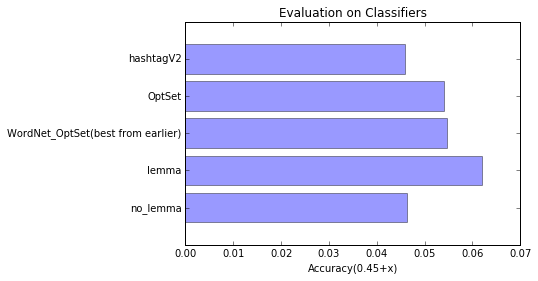

In [317]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#trainTweets,trainLabels = preprocess_file_no_lemma\
#(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json")
testTweets,testLabels = preprocess_file_no_lemma\
(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\test.json")
print "-------------------------------------------------------------------------------------------------"

performance = []

def test_classifier_lemma():

    global trainTweets
    global testTweets
    global testLabels
    global trainLabels
    
    print "testing no lemmatization in proporcessing, default settings"
    trainFea = convert_to_feature_dicts(trainTweets,engStop,2)
    testFea = convert_to_feature_dicts(testTweets,engStop,0)

    vectorize_final = DictVectorizer()
    trainData = vectorize.fit_transform(trainFea)
    testData = vectorize.transform(testFea)

    lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    lr.fit(trainData,trainLabels)

    a = do_heldout_validation(lr,testData,testLabels)
    prediction = lr.predict(testData)
    truth = testLabels
    print "accuracy",
    print accuracy_score(truth,prediction)
    print classification_report(truth,prediction)
    performance.append(accuracy_score(truth,prediction)-0.45)
    ###########################################################
    print "testing with lemmatization in proporcessing, default settings"
    trainTweets_lem,trainLabels_lem = preprocess_file\
    (r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json")
    testTweets_lem,testLabels_lem = preprocess_file\
    (r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\test.json")
    
    trainFea_lem = convert_to_feature_dicts(trainTweets_lem,engStop,2)
    testFea_lem = convert_to_feature_dicts(testTweets_lem,engStop,0)
    
    #print len(testFea_lem),len(testLabels)
    #print testFea_lem
    vectorize_lem = DictVectorizer()
    trainData_lem = vectorize_lem.fit_transform(trainFea_lem)
    testData_lem = vectorize_lem.transform(testFea_lem)   
    
    #print testData_lem.get_shape()
    
    lr_lem = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    lr_lem.fit(trainData_lem,trainLabels)
    #print lr_lem
    #a = do_heldout_validation(lr_lem,testData_lem,testLabels_lem)
    #print a   
    prediction = lr_lem.predict(testData_lem)
    print len(prediction)
    truth = testLabels_lem
    print "accuracy"
    print accuracy_score(truth,prediction)
    print classification_report(truth,prediction)
    performance.append(accuracy_score(truth,prediction)-0.45)
    
def test_classifier_WordNet():
    global trainTweets
    global testTweets
    global testLabels
    global trainLabels
    print "testing the classifier with WordNet lexicon and optimized settings (my best classifier)"
    trainFea_Wordnet = convert_to_feature_dict_lexicon(trainTweets,engStop,2,WordnetSetPos,WordnetSetNeg)
    vectorize_Wordnet = DictVectorizer()
    trainData_Wordnet = vectorize.fit_transform(trainFea)
    testData_Wordnet = vectorize.transform(testFea)
    
    lr_Wordnet = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    lr_Wordnet.fit(trainData_Wordnet,trainLabels)
    
    a = do_heldout_validation(lr_Wordnet,testData_Wordnet,testLabels)
    prediction = lr_Wordnet.predict(testData_Wordnet)
    truth = testLabels
    print "accuracy"
    print accuracy_score(truth,prediction)
    print classification_report(truth,prediction)
    performance.append(accuracy_score(truth,prediction)-0.45)

def test_classifier_Tuning():
    global trainTweets
    global testTweets
    global testLabels
    global trainLabels
    print "testing the classifier with optimized settings from tunning process"
    
    trainFea = convert_to_feature_dicts(trainTweets,engStop,2)
    testFea = convert_to_feature_dicts(testTweets,engStop,0)

    vectorize_final = DictVectorizer()
    trainData = vectorize.fit_transform(trainFea)
    testData = vectorize.transform(testFea)
    
    lr_Tunning = LogisticRegression(class_weight=None,solver='lbfgs',\
                                    fit_intercept=False,C=1.0)
    lr_Tunning.fit(trainData,trainLabels)
    
    a = do_heldout_validation(lr_Tunning,testData,testLabels)
    prediction = lr_Tunning.predict(testData)
    truth = testLabels
    print "accuracy"
    print accuracy_score(truth,prediction)
    print classification_report(truth,prediction)
    performance.append(accuracy_score(truth,prediction)-0.45)
    
def test_classifier_hashtagV2():
    print "testing the classifier with new hashtag method which is developed in improvement"
    a = classifier_hashtagsV2(r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\train.json",\
                          r"C:\Users\Ryan\OneDrive\study\web search and text analysis\assignment1\Assignment1_data\test.json")
    performance.append(a-0.45)
    
test_classifier_lemma()
print "-------------------------------------------------------------------------------------------------"
test_classifier_WordNet()
print "-------------------------------------------------------------------------------------------------"
test_classifier_Tuning()
print "-------------------------------------------------------------------------------------------------"
test_classifier_hashtagV2()
print "-------------------------------------------------------------------------------------------------"

classifiers = ('no_lemma', 'lemma', 'WordNet_OptSet(best from earlier)', 'OptSet', 'hashtagV2')
y_pos = np.arange(len(classifiers))
#print y_pos
#print performance
#error = np.random.rand(len(people))
#print error

plt.barh(y_pos, performance, height=0.8,align='center',alpha=0.4)
plt.yticks(y_pos, classifiers)
plt.xlabel('Accuracy(0.45+x)')
plt.title('Evaluation on Classifiers')

plt.show()


In this cell, I tested five classifiers on the test data, they are:

WordNet_OptSet(best from earlier) --> the best classifier I found in the previous sections, using WordNet as a lexicon
                                      to provide an extra feature, and also using the "best" parameters settings,
no_lemma                          --> the default classifier, does not use lemmatization, use default 
                                      setting(solver='lbfgs', multi_class='multinomial'),does not use any lexicon
lemma                             --> this classifier use lemmatization when preprocessing tweets, use default settings
OptSet                            --> this is the classifier using the "best" parameters settings tested from 
                                      previous tunning section
hashtagV2                         --> this classifier uses a different way to extra the hashtags, if there is a 
                                      hashtag contains only uppercase letters, all the letters will be transferred to 
                                      lowercase and then imported to MaxMatch. 

The tables and bar chart have been genarated in the output area

Start from the most affected classifier 'OptSet', there is a performance drop-off on it. It may be because that the 
"Best" parameters are got from the tunning process which is based on the accuracy to development data. So the classifier
may need to re-tunning based on the test data(this is meanless in practical) for getting a better performance.

Besides, since my best classifier also uses the "opitimized" parameters (the same as 'OptSet'), the performance of it
is also affected a lot.

'hashtagV2' does not bring improvement in this case, this could because the affected features are too little.

Fortunately, the classifier 'OptSet' and 'WordNet_OptSet' still works much better than the default 'no_lemma' classifier,
which shows the improvment brought by my previous works

The classifier with the best performance is 'lemma', because it does not use the previouly tunned parameters, its 
performance will not be affected by the new dataset too much. The high accuracy demonstrateds the applicability of 
lemmatization in preprocessing stage. 

Based on the result, my proposed solution is to add lemmatization in the preprocessing stage, and also add WordNet 
lexicon as one feature. Then retune the parameter of the new classifier to get a better classifier(I won perform this
in this project, since it may cause the program cannot be finished in 10 minutes).

In conclusion, I learned a lot from this project:
1. the process of performing a machine learning method on Natural Language processing tasks. If I get another project,
I won't become confused of not knowing where I should start from. 
2. How to use programming in data mining smartly, especially for a large project or dataset. More specifically, I learned how hashed data structures(e.g. dictionary & set) is necessary for looking up in a large dataset. Without it, 
some codes will take forever to finish. 
3. Overly tunning the parameters of classifier based on one dataset could cause overfitting, which restrict the performance of the classifier to other dataset
4. Python is very easy to use
5. How to use python to generate visualized data for presentation
6. Using Lexicon is a efficient way to feature engineering for text mining tasks

For improving the classifier, I have several ideas:
1. we can combine different classifiers to generate one classifer. In other words, we can use the result of each different classifier as one feature of each instance
2. We should reference some standard parameters for each specific tasks, where the best parameter settings could have been found by others, we don't need to reinvent the wheel
3. some dictionaries could be used like disease name dictionaries, which may have some relationship with the sentiment of sentences.
